<a href="https://colab.research.google.com/github/tej37/my-personal-machine-learning-cheat-sheet1/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# titanic simple example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

titanic = sns.load_dataset('titanic')

In [ ]:

titanic.describe()
titanic.info()
titanic['sex'].shape
titanic.head()

titanic['class'] = titanic['class'].astype('object')
print(type(titanic["class"][1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
<class 'str'>


In [ ]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]

titanic.dropna(axis=0,inplace=True)
titanic.info()
titanic.head()
col=titanic.columns
print(col)
titanic.dtypes



<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB
Index(['survived', 'pclass', 'sex', 'age'], dtype='object')


<ipython-input-3-fd164793df26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0,inplace=True)


survived      int64
pclass        int64
sex          object
age         float64
dtype: object

In [ ]:
X_train=titanic
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))


# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)


# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_train.head()





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,survived,pclass,age,0,1
0,0,3,22.0,0.0,1.0
1,1,1,38.0,1.0,0.0
2,1,3,26.0,1.0,0.0
3,1,1,35.0,1.0,0.0
4,0,3,35.0,0.0,1.0


In [ ]:
X=OH_X_train.drop(columns="survived")
Y=OH_X_train["survived"]
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)


# the 3 approaches to handel Categorical Variables

In [ ]:
#Score from Approach 1 (Drop Categorical Variables)
#We drop the object columns with the select_dtypes() method.

drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_test.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
#print(score_dataset(drop_X_train, drop_X_valid, y_train, y_test))

MAE from Approach 1 (Drop categorical variables):


In [ ]:
#Score from Approach 2 (Ordinal Encoding)
#Scikit-learn has a OrdinalEncoder class that can be used to get ordinal encodings. We loop over the categorical variables and apply the ordinal encoder separately to each column.

from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols]=ordinal_encoder.fit_transform(label_X_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.fit_transform(X_test[object_cols])
print(label_X_train)
print(label_X_test)

#print("MAE from Approach 2 (Ordinal Encoding):")
#print(score_dataset(label_X_train, label_X_valid, y_train, y_test))

     pclass  sex   age
441       3  1.0  20.0
645       1  1.0  48.0
553       3  1.0  22.0
688       3  1.0  18.0
456       1  1.0  65.0
..      ...  ...   ...
94        3  1.0  59.0
503       3  0.0  37.0
147       3  0.0   9.0
876       3  1.0  20.0
255       3  0.0  29.0

[571 rows x 3 columns]
     pclass  sex   age
789       1  1.0  46.0
114       3  0.0  17.0
92        1  1.0  46.0
51        3  1.0  21.0
539       1  0.0  22.0
..      ...  ...   ...
528       3  1.0  39.0
448       3  0.0   5.0
263       1  1.0  40.0
355       3  1.0  28.0
482       3  1.0  50.0

[143 rows x 3 columns]


In [ ]:
'''Score from Approach 3 (One-Hot Encoding)
We use the OneHotEncoder class from scikit-learn to get one-hot encodings. There are a number of parameters that can be used to customize its behavior.

We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).
To use the encoder, we supply only the categorical columns that we want to be one-hot encoded. For instance, to encode the training data, we supply X_train[object_cols]. (object_cols in the code cell below is a list of the column names with categorical data, and so X_train[object_cols] contains all of the categorical data in the training set.)
'''
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

print("MAE from Approach 3 (One-Hot Encoding):")
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))


NameError: name 'pd' is not defined

# supervise learing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))# include R2-score
train_pred=model.predict(X_train)
print(mean_squared_error(train_pred,y_train))
test_pred=model.predict(X_test)
print(accuracy_score(test_pred,y_test))
print(mean_squared_error(test_pred,y_test))


0.8633975481611208
0.13660245183887915
0.7762237762237763
0.22377622377622378


1
0.8598949211908932
2
0.8651488616462347
2
0.8651488616462347


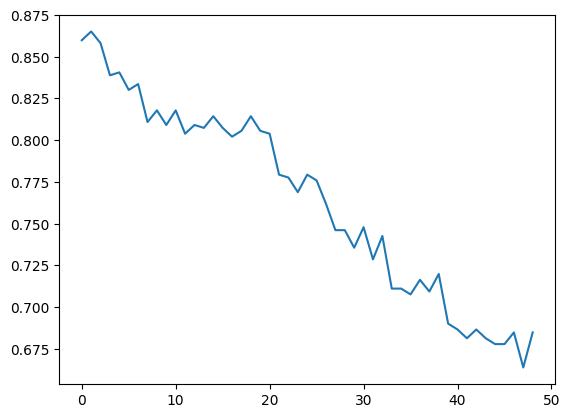

In [ ]:
best_score=0

scor=[]
for k in range(1,50):
 model=KNeighborsClassifier(n_neighbors=k)
 model.fit(X_train,y_train)
 scor.append(model.score(X_train,y_train))
 if best_score < model.score(X_train,y_train):
  print(k)
  print(model.score(X_train,y_train))
  best_k=k
  best_score=model.score(X_train,y_train)
print(best_k)
print(best_score)
plt.plot(scor)



**cross validation:make a validation set and to avoid over an under fitting **

In [ ]:
from sklearn.model_selection import cross_val_score

acc_ros_val=cross_val_score(model,X_train,y_train,cv=5,scoring='f1') #nous donne accuracy of all the 5 validation sets
print(f1_score(train_pred,y_train))
print(acc_ros_val)
print(acc_ros_val.mean())

0.821917808219178
[0.8        0.76744186 0.74725275 0.77272727 0.73563218]
0.7646108128706365


In [ ]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

*validation curve nous donne la moyenne de n validation set pour chaque parametre exemple f(k)=acc_cros_val.mean(*

In [ ]:
from sklearn.model_selection import validation_curve

k=np.arange(50,200)
train_score,val_score=validation_curve(model,X_train,y_train,param_name='n_estimators',param_range=k,cv=5)
val_score.shape

(150, 5)

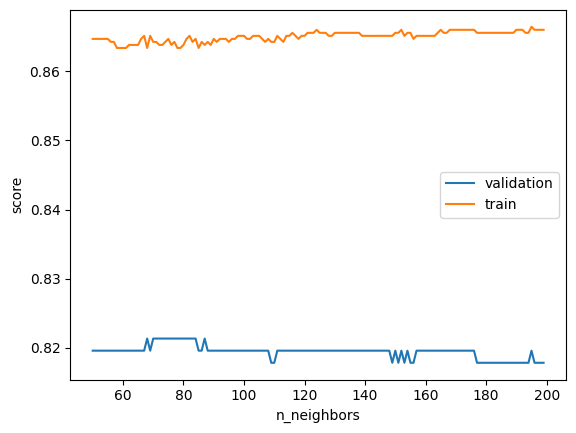

In [ ]:
plt.plot(k,val_score.mean(axis=1),label='validation')
plt.plot(k,train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()


**grid searchcv for tuning all hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={ 'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan'],
             'weights': ['uniform', 'distance'],
           'algorithm': ['auto', 'ball_tree', 'kd_tree']

           }
param_grid1 = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node

}

knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
#grid=GridSearchCV(knn,param_grid,cv=5)
grid=GridSearchCV(estimator=rfc,param_grid=param_grid1,cv=5,scoring='f1')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
model1=grid.best_estimator_
model1.score(X_test,y_test)


0.8073684210526316
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}


0.7552447552447552

 **cross validation techniques**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris




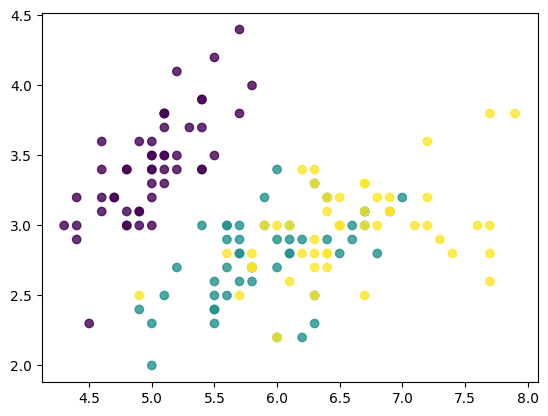

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold,GroupKFold                                                                     #leaveoneout je valid sur tout les cartes,
from sklearn.neighbors import KNeighborsClassifier
#help(ShuffleSplit)
#type_cv=LeaveOneOut()
#type_cv=KFold(n_splits=5, shuffle=True, random_state=0)
#ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
#type_cv=ShuffleSplit(n_splits=4, test_size=0.2)
#type_cv=StratifiedKFold(5)
type_cv=GroupKFold(4).get_n_splits(X,y,groups=X[:, 0])
cross_val_score(KNeighborsClassifier(),X,y,cv=type_cv)


array([0.97368421, 0.94736842, 0.94594595, 1.        ])

**data preprosessing**


pipeline 24 25

imput 26

In [ ]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex']


# unsupervise learning

(100, 2)


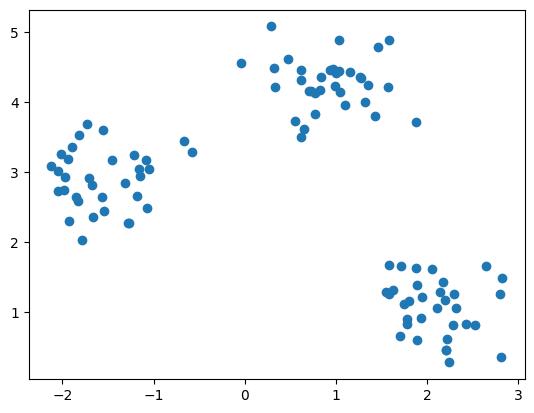

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])
print(X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


30.87053128014067

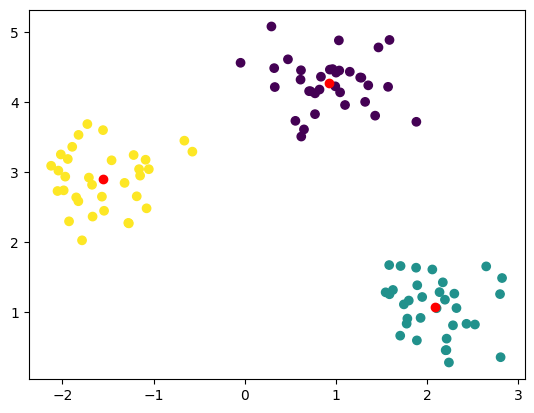

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(X)
#pred=model.labels_
pred=model.predict(X)
plt.scatter(X[:,0], X[:,1],c=pred)
# position du centroide
c=model.cluster_centers_
plt.scatter(c[:,0], c[:,1],c='r')
model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

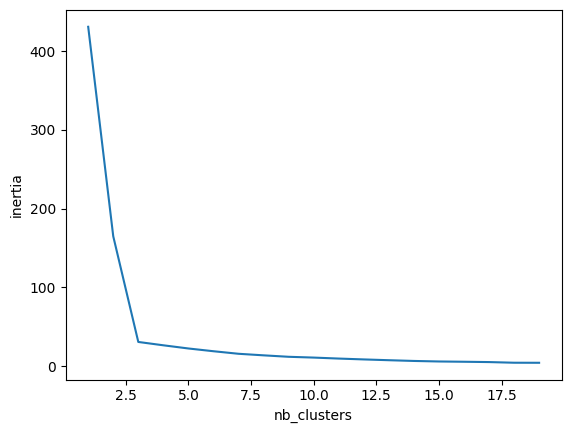

In [ ]:
inertia=[]
k_range=range(1,20)
for i in k_range:
  model1=KMeans(n_clusters=i)
  model1.fit(X)
  inertia.append(model1.inertia_)
plt.plot(k_range,inertia)
plt.xlabel('nb_clusters')
plt.ylabel('inertia')

**anomaly detection**

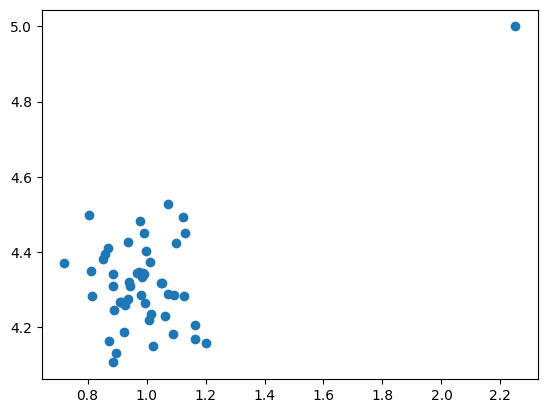

In [ ]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])


In [ ]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination=0.01)
model.fit(X)
ped=model.predict(X)

[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


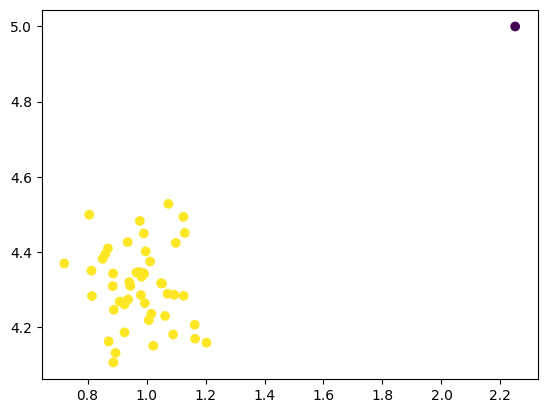

In [ ]:
print(pred)
plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

**Application : Digits Outliers**

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target


(8, 8)
(1797,)


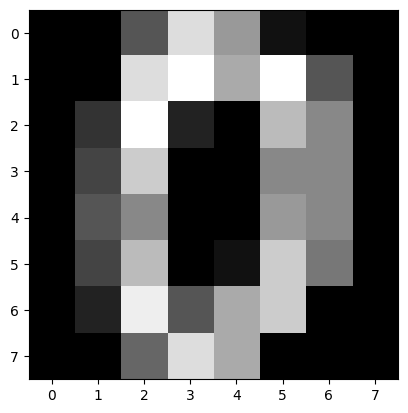

In [ ]:
print(images[0].shape)
print(y.shape)
plt.imshow(images[0],cmap=plt.cm.gray)

In [ ]:
model1=IsolationForest(contamination=0.02)
model1.fit(X)
outliers=model1.predict(X)==-1
print(outliers.shape)
print(images[outliers].shape)
print(images.shape)


(1797,)
(36, 8, 8)
(1797, 8, 8)


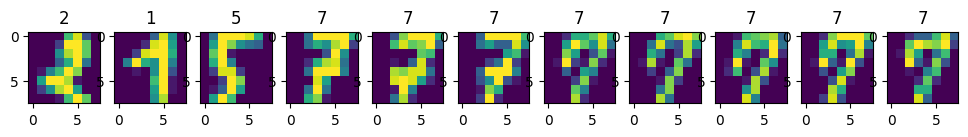

In [ ]:
plt.figure(figsize=(12, 3))
for i in range (11):
  plt.subplot(1, 11, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

**PCA : Reduction de dimension**

visualsation

(1797, 64)


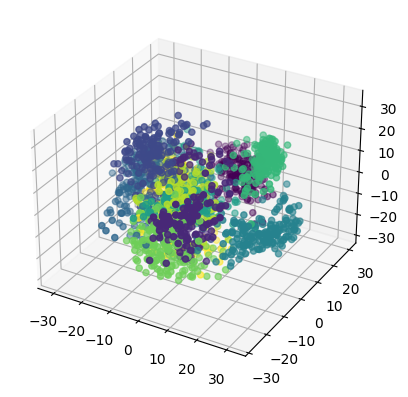

In [ ]:
print(X.shape)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
model=PCA(n_components=3)
X_reducet=model.fit_transform(X)
'''
plt.scatter(X_reducet[:,0],X_reducet[:,1],c=y)
plt.colorbar()
plt.show()
'''

ax = plt.axes(projection='3d')
ax.scatter(X_reducet[:, 0], X_reducet[:, 1], X_reducet[:,2], c=y)
plt.show()

data compression for faster learning

64
[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]
[0.14890594 0.285093

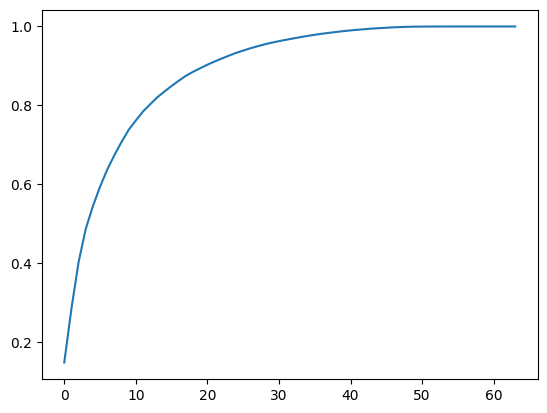

In [ ]:
n_dims=X.shape[1]
print(n_dims)
model1=PCA(n_components=n_dims)
model1.fit_transform(X)
variances = model1.explained_variance_ratio_ #la variance presercer pour chaque composente
print(variances)
print(np.cumsum(variances))
plt.plot(np.cumsum(variances))
meilleur_dims = np.argmax(np.cumsum(variances) > 0.99)
print(meilleur_dims)


In [ ]:
model2=PCA(n_components=0.95)
model2.fit(X)
print(model2.n_components_)

29
